In [27]:
import pandas as pd
import numpy as np

In [16]:
file_name = '/Users/alina_boichenko/final-assignment/data-sets/auto-mpg.xlsx'
df = pd.read_excel(file_name)
df.to_csv('auto-mpg.csv', index=False)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


<h4> 1. Drop column Origin from the dataset. </h4>

In [17]:
df = df.drop(columns=['origin'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


<h4> 2. Find out all the missing values in the dataset and replace it with its most
appropriate replacement. </h4>

In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    2
model year      2
car name        0
CAR Number      7
dtype: int64

In [24]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

mpg
mpg
False    98
Name: count, dtype: int64

cylinders
cylinders
False    98
Name: count, dtype: int64

displacement
displacement
False    98
Name: count, dtype: int64

horsepower
horsepower
False    98
Name: count, dtype: int64

weight
weight
False    98
Name: count, dtype: int64

acceleration
acceleration
False    96
True      2
Name: count, dtype: int64

model year
model year
False    96
True      2
Name: count, dtype: int64

car name
car name
False    98
Name: count, dtype: int64

CAR Number
CAR Number
False    91
True      7
Name: count, dtype: int64



In [25]:
avg_acceleration = df['acceleration'].astype('float').mean(axis=0)
print('Average of acceleration:', avg_acceleration)

Average of acceleration: 14.046875


In [28]:
df['acceleration'].replace(np.nan, avg_acceleration, inplace=True)

In [29]:
avg_model_year = df['model year'].astype('float').mean(axis=0)
print('Average of model year:', avg_model_year)

Average of model year: 71.26041666666667


In [30]:
df['model year'].replace(np.nan, avg_model_year, inplace=True)

/var/folders/mk/kx1__1mx6dsfdz1t5jz1b7rm0000gn/T/ipykernel_5666/2225963125.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['model year'].replace(np.nan, avg_model_year, inplace=True)


In [32]:
df['CAR Number']

0      L6V 043
1       RTY079
2       MTP600
3       MNJ000
4     JEETMEET
        ...   
93      FGTEE4
94      GTTYR6
95     TTGGT53
96     TGTYY67
97      HUYT76
Name: CAR Number, Length: 98, dtype: object

<h4>3. Find and remove duplicate entries for the column ‘CAR Number’</h4>

In [39]:
duplicates = df.duplicated(subset=['CAR Number'])
duplicates

0     False
1     False
2     False
3     False
4     False
      ...  
93    False
94    False
95    False
96    False
97    False
Length: 98, dtype: bool

In [40]:
df.drop_duplicates(subset=['CAR Number'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET
...,...,...,...,...,...,...,...,...,...
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67


<h4> 4.Get the basic insights:
<ul>
    <li> Display the first five and last five rows</li>
    <li> Display all the column names in the dataset</li>
    <li> Display the concise summary of your dataset</li>
    <li> Display the name of the car with maximum number of horsepower</li>
</ul>
</h4>

<h4>The first five and last five rows</h4>

In [42]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [43]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


<h4>All the column names in the dataset</h4>

In [47]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

<h4>The concise summary of dataset</h4>

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           98 non-null     int64  
 1   cylinders     98 non-null     int64  
 2   displacement  98 non-null     float64
 3   horsepower    98 non-null     int64  
 4   weight        98 non-null     int64  
 5   acceleration  98 non-null     float64
 6   model year    98 non-null     float64
 7   car name      98 non-null     object 
 8   CAR Number    91 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ KB


<h4>The name of the car with maximum number of horsepower</h4>

In [52]:
df.loc[df['horsepower'].idxmax(), 'car name']

'pontiac catalina'

<h4>5. Change the name of the column "mpg" to "L/100km".</h4>

In [53]:
df["L/100km"] = 235/df["mpg"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043,13.055556
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079,15.666667
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600,13.055556
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000,14.687500
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET,13.823529


<h4>6. Normalize the column “Weight” so that the values range from 0 to 1</h4>

In [55]:
df['weight'] = df['weight']/df['weight'].max()
df['weight']

0     0.681712
1     0.718482
2     0.668482
3     0.667899
4     0.671012
        ...   
93    0.824319
94    0.921206
95    0.963230
96    0.743385
97    0.607198
Name: weight, Length: 98, dtype: float64

<h4>7. Binning the horsepower into categories "high", "medium", and "low" </h4>

In [56]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)

Plot the histogram of horsepower to see the distribution of horsepower.

Text(0.5, 1.0, 'horsepower bins')

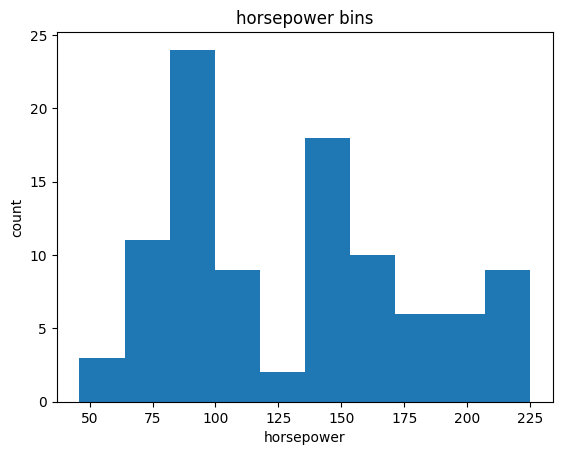

In [57]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [58]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

Set group names

In [59]:
group_names = ['Low', 'Medium', 'High']

In [60]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']]

,horsepower,horsepower-binned
0,130,Medium
1,165,Medium
2,150,Medium
3,150,Medium
4,140,Medium
...,...,...
93,150,Medium
94,215,High
95,225,High
96,175,High


See the number of vehicles in each bin:

In [61]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       44
Medium    30
High      24
Name: count, dtype: int64

Plot the distribution of each bin:

Text(0.5, 1.0, 'horsepower bins')

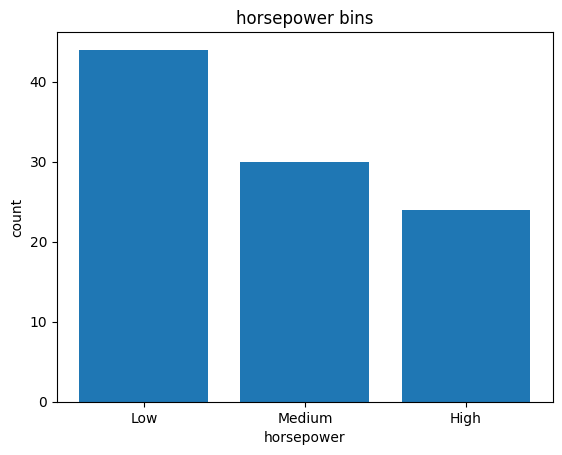

In [62]:
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<h4>8. Detect outliers using Z-score and remove them</h4>

Standart deviation and mean

In [71]:
horsepower_std = np.nanstd(df.horsepower)

In [72]:
horsepower_mean = np.nanmean(df.horsepower)

In [73]:
print("Mean horsepower is:", horsepower_mean)
print("Std horsepower is:", horsepower_std)

Mean horsepower is: 131.0204081632653
Std horsepower is: 47.542672473850814


Calculate Z score:

In [74]:
df['zscore_horsepower'] = (df.horsepower - horsepower_mean)/horsepower_std
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,horsepower-binned,zscore_horsepower
0,18,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,13.055556,Medium,-0.021463
1,15,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,15.666667,Medium,0.714718
2,18,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,13.055556,Medium,0.399212
3,16,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,14.687500,Medium,0.399212
4,17,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,13.823529,Medium,0.188874


Extract the outliers/extreme values based on Z-score 

In [80]:
df[(df.zscore_horsepower<-3)|(df.zscore_horsepower>3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,horsepower-binned,zscore_horsepower


We don't have any outliers with Z-score above 3 or below -3, it could mean that all data points fall within the range considered "normal" based on the Z-score threshold. We can try adjusting the threshold to see if any values fall outside of a wider range:

In [82]:
df[(df.zscore_horsepower<-1.8)|(df.zscore_horsepower>1.8)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,horsepower-binned,zscore_horsepower
6,14,8,454.0,220,0.847082,9.0,70.0,chevrolet impala,NEET098,16.785714,High,1.871573
8,14,8,455.0,225,0.860895,10.0,70.0,pontiac catalina,NMTL580,16.785714,High,1.976742
13,14,8,455.0,225,0.600389,10.0,70.0,buick estate wagon (sw),YUTN78,16.785714,High,1.976742
95,12,8,455.0,225,0.963230,11.0,73.0,buick electra 225 custom,TTGGT53,19.583333,High,1.976742


Remove the observations containing the outliers

In [85]:
df_no_outliers = df[np.abs(df['zscore_horsepower']) < 1.8]
df_no_outliers

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number,L/100km,horsepower-binned,zscore_horsepower
0,18,8,307.0,130,0.681712,12.0,70.0,chevrolet chevelle malibu,L6V 043,13.055556,Medium,-0.021463
1,15,8,350.0,165,0.718482,11.5,70.0,buick skylark 320,RTY079,15.666667,Medium,0.714718
2,18,8,318.0,150,0.668482,11.0,70.0,plymouth satellite,MTP600,13.055556,Medium,0.399212
3,16,8,304.0,150,0.667899,12.0,70.0,amc rebel sst,MNJ000,14.687500,Medium,0.399212
4,17,8,302.0,140,0.671012,10.5,70.0,ford torino,JEETMEET,13.823529,Medium,0.188874
...,...,...,...,...,...,...,...,...,...,...,...,...
92,13,8,351.0,158,0.848833,13.0,73.0,ford ltd,GTH654,18.076923,Medium,0.567482
93,14,8,318.0,150,0.824319,14.5,73.0,plymouth fury gran sedan,FGTEE4,16.785714,Medium,0.399212
94,13,8,440.0,215,0.921206,11.0,73.0,chrysler new yorker brougham,GTTYR6,18.076923,High,1.766405
96,13,8,360.0,175,0.743385,11.0,73.0,amc ambassador brougham,TGTYY67,18.076923,High,0.925055
